<span style="font-size: 20px;">**RAINFALL PREDICTION MODEL FOR "The Daily Buzz".**.</span>


**IMPORTING DATA AND PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [3]:
df= pd.read_csv('C:/Users/91841/Downloads/sydney.csv', header=0)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [5]:
df.describe

<bound method NDFrame.describe of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     01-02-2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1     02-02-2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2     03-02-2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3     04-02-2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4     05-02-2008   Sydney     19.7     25.7      77.4          NaN       0.0   
...          ...      ...      ...      ...       ...          ...       ...   
3332  21-06-2017   Sydney      8.6     19.6       0.0          2.0       7.8   
3333  22-06-2017   Sydney      9.3     19.2       0.0          2.0       9.2   
3334  23-06-2017   Sydney      9.4     17.7       0.0          2.4       2.7   
3335  24-06-2017   Sydney     10.1     19.3       0.0          1.4       9.3   
3336  25-06-2017   Sydney      7.6     19.3       0.0          3.4       9.4   

     

In [6]:
df.corr()

C:\Users\91841\AppData\Local\Temp\ipykernel_1964\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.770893,0.012883,0.571257,-0.063154,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922
MaxTemp,0.770893,1.000000,-0.140107,0.513138,0.326683,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457
Rainfall,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698
Evaporation,0.571257,0.513138,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629
Sunshine,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139
Humidity9am,0.052490,-0.187437,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598
Humidity3pm,0.271686,-0.152615,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047
Pressure9am,-0.393827,-0.389088,-0.037051,-0.349421,-0.046654,0.263977,0.154908,1.000000,0.963173,-0.012196,-0.044233,-0.419440,-0.346731
Pressure3pm,-0.356406,-0.425169,0.003216,-0.303330,-0.094841,0.252360,0.183647,0.963173,1.000000,0.020884,-0.003187,-0.405047,-0.392653
Cloud9am,0.260508,-0.095859,0.277427,-0.041160,-0.734302,0.459455,0.498119,-0.012196,0.020884,1.000000,0.609556,0.097135,-0.098202


In [7]:
df=df.drop('Date', axis=1)

In [8]:
df=df.drop('Location', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


In [10]:
df = pd.get_dummies(df, columns=["RainToday"], drop_first=True)
df = pd.get_dummies(df, columns=["RainTomorrow"], drop_first=True)

In [11]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [12]:
df.shape

(3337, 15)

In [13]:
df=df.fillna(df.mean())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   uint8  
 14  RainTomorrow_Yes  3337 non-null   uint8  
dtypes: float64(13), uint8(2)
memory usage: 345.6 KB


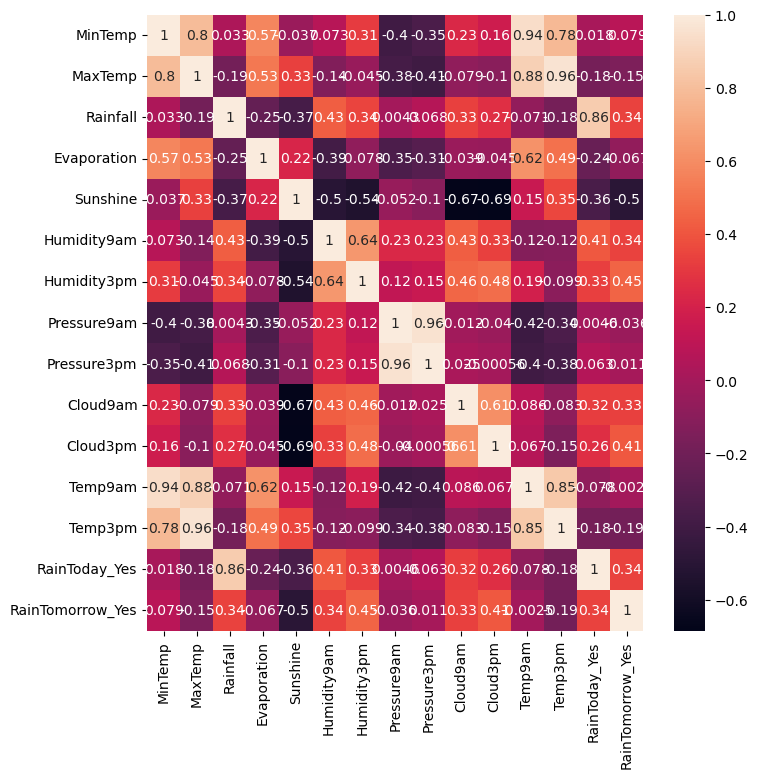

In [15]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(8,8))

#plot heat map
g=sns.heatmap(corrmat,annot=True)

**Checking for Outliers using Box-plot**

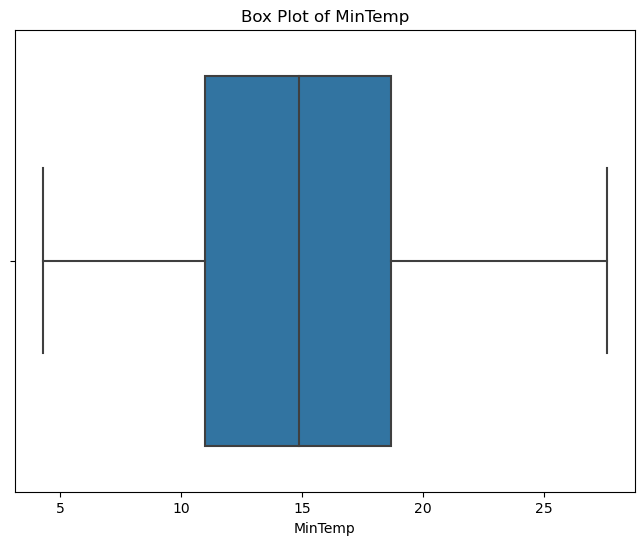

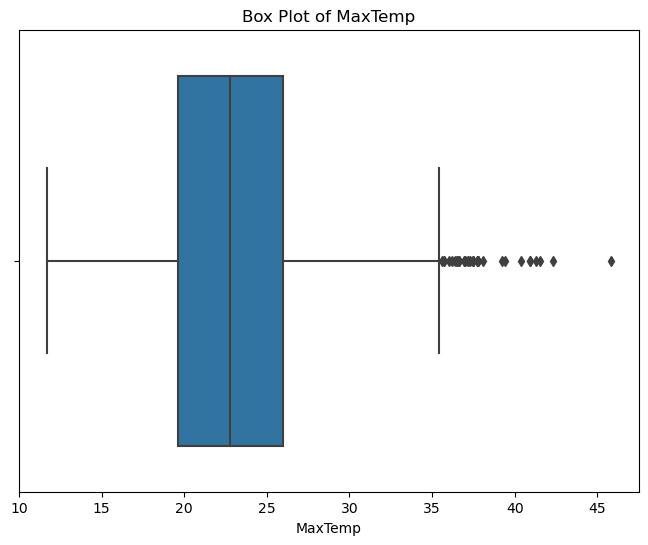

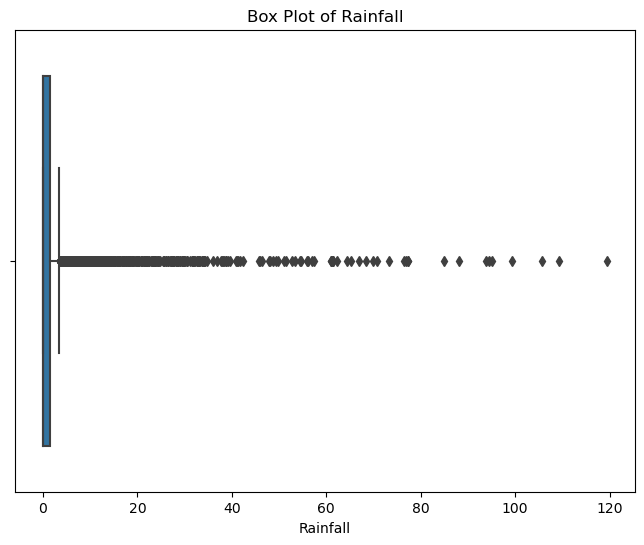

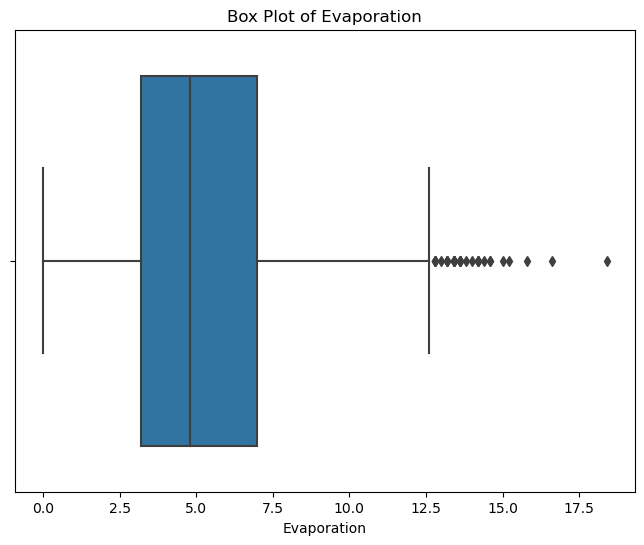

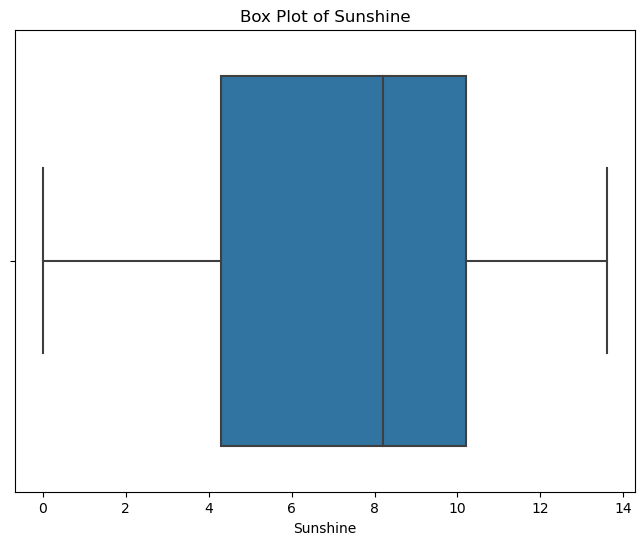

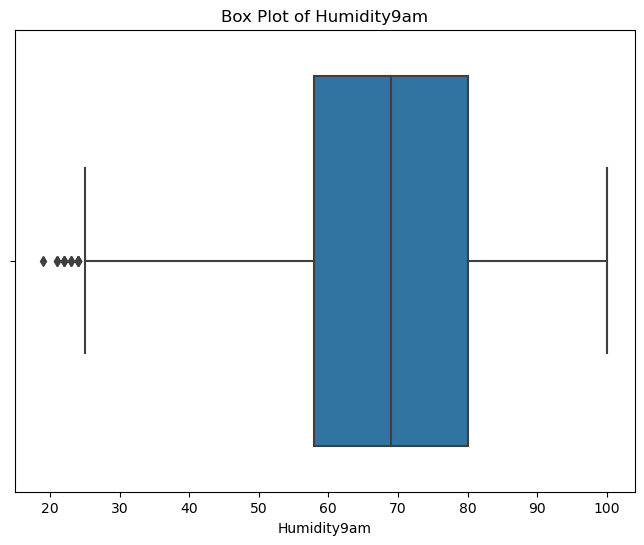

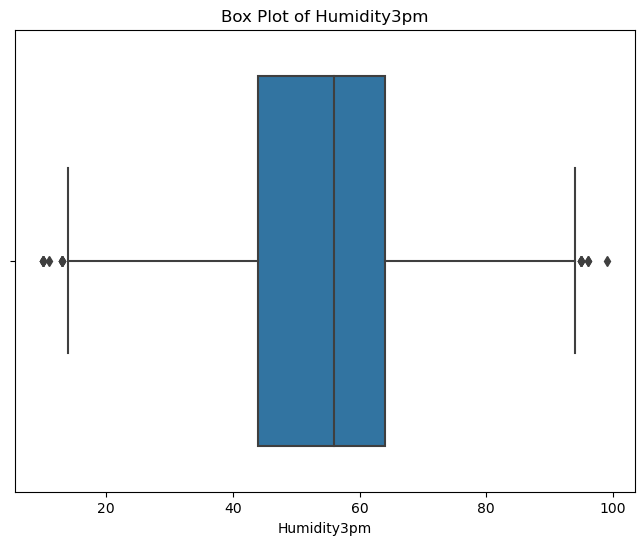

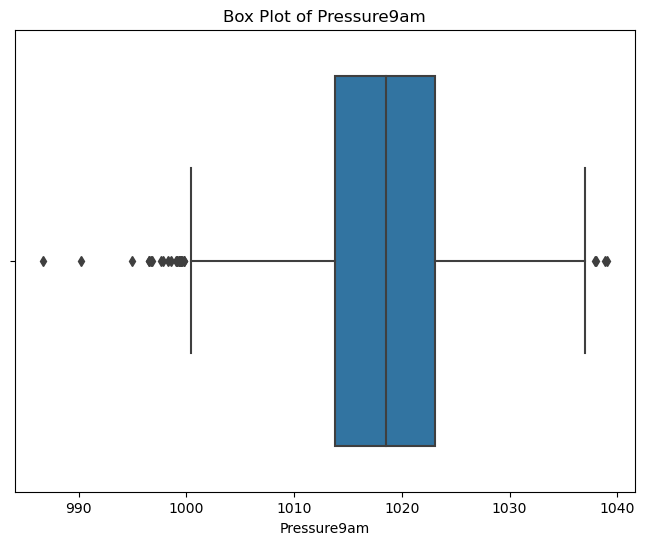

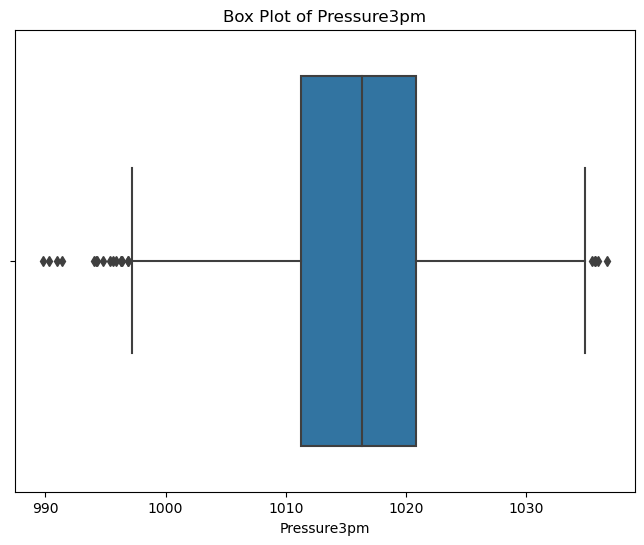

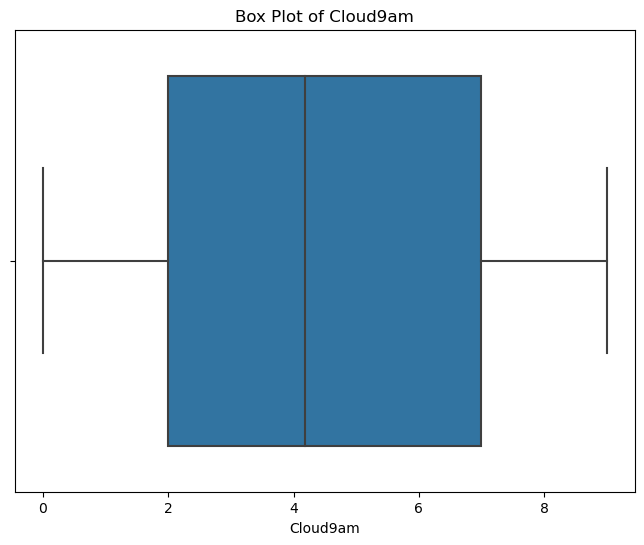

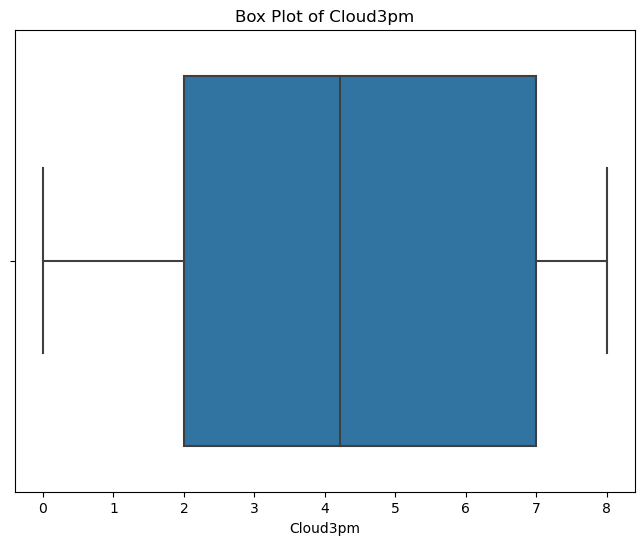

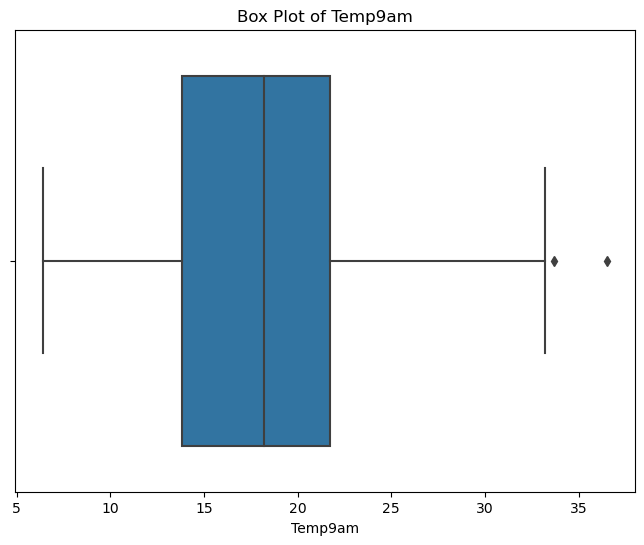

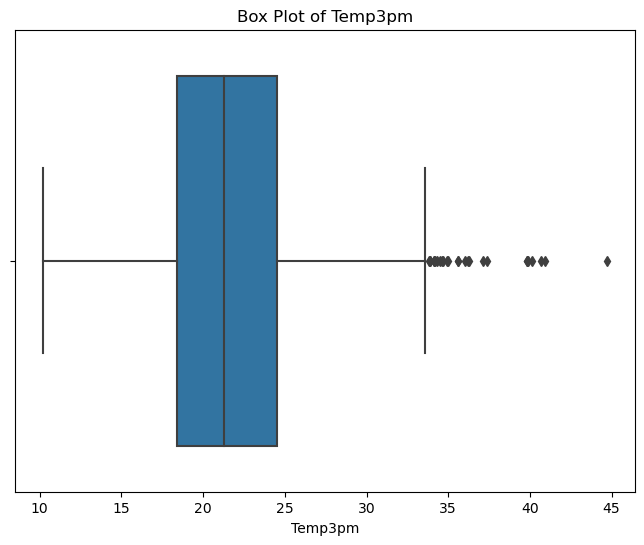

In [16]:
# creating separate box plots by iteration 
for feature in df.columns:
    if df[feature].dtype == 'float64':  # Check if the feature is numerical
        plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
        sns.boxplot(x=df[feature])
        plt.title('Box Plot of {}'.format(feature))
        plt.xlabel(feature)
        plt.show()


Potential Outliers found in
1. maximum temp
2. rainfall
3. evaporation
4. humidity 9 am
5. humidity 3 pm
6. pressue 9 am
7. pressue 3 pm
8. temperature 9 am
9. temperature 3 pm

**Treating outliers using Inter Quartile Range**

In [17]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lv=df.MaxTemp.quantile(0.25)-(IQR*1.5)
uv=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lv, uv)

10.000000000000004 35.599999999999994


In [18]:
df.loc[df['MaxTemp']>=35.59,'MaxTemp']=35.99
df.loc[df['MaxTemp']<=10.00,'MaxTemp']=10.00

In [19]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.0999999999999996 3.4999999999999996


In [20]:
df.loc[df['Rainfall']>=3.49,'Rainfall']=3.49
df.loc[df['Rainfall']<=-2.09,'Rainfall']=-2.09

In [21]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.499999999999999 12.7


In [22]:
df.loc[df['Evaporation']>=12.7,'Evaporation']=12.7
df.loc[df['Evaporation']<=-2.49,'Evaporation']=-2.49

In [23]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

25.0 113.0


In [24]:
df.loc[df['Humidity9am']>=113.0,'Humidity9am']=113.0
df.loc[df['Humidity9am']<=25,'Humidity9am']=25

In [25]:
IQR=df.Humidity3pm.quantile(0.75)-df.Humidity3pm.quantile(0.25)
lower_bridge=df.Humidity3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

14.0 94.0


In [26]:
df.loc[df['Humidity3pm']>=94.0,'Humidity3pm']=94.0
df.loc[df['Humidity3pm']<=14.0,'Humidity3pm']=14.0

In [27]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

999.8499999999999 1037.0500000000002


In [28]:
df.loc[df['Pressure9am']>=1037.05,'Pressure9am']=1037.05
df.loc[df['Pressure9am']<=999.84,'Pressure9am']=999.84

In [29]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

997.05 1035.05


In [30]:
df.loc[df['Pressure3pm']>=1035.05,'Pressure3pm']=1035.05
df.loc[df['Pressure3pm']<=997.05,'Pressure3pm']=997.05

In [31]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.9500000000000028 33.55


In [32]:
df.loc[df['Temp9am']>=33.55,'Temp9am']=33.55
df.loc[df['Temp9am']<=1.95,'Temp9am']=1.95

In [33]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

9.249999999999996 33.650000000000006


In [34]:
df.loc[df['Temp3pm']>=33.65,'Temp3pm']=33.65
df.loc[df['Temp3pm']<=9.24,'Temp3pm']=9.24

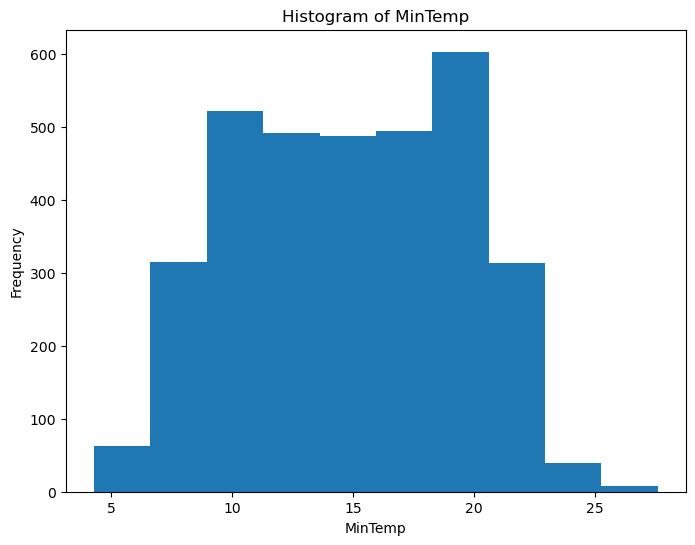

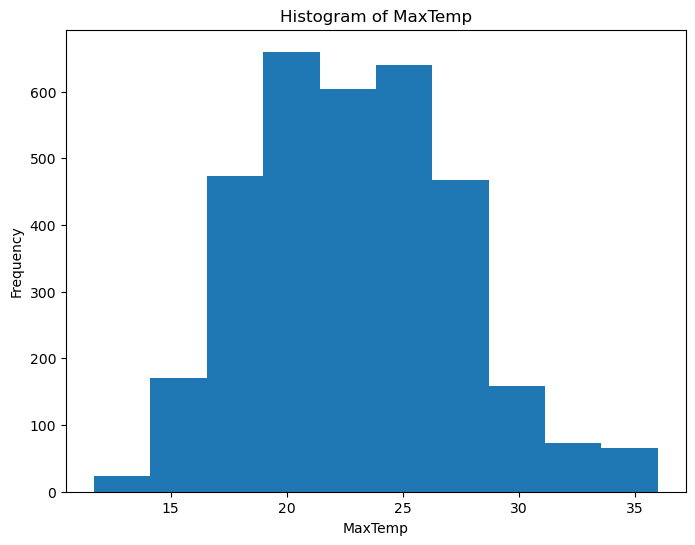

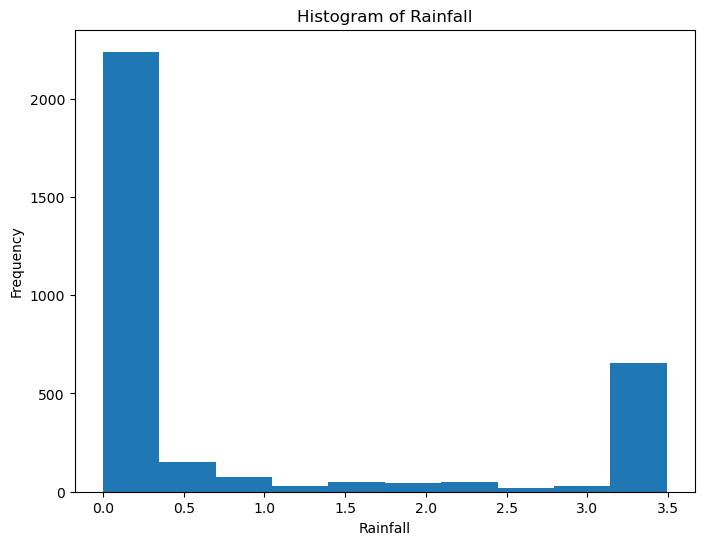

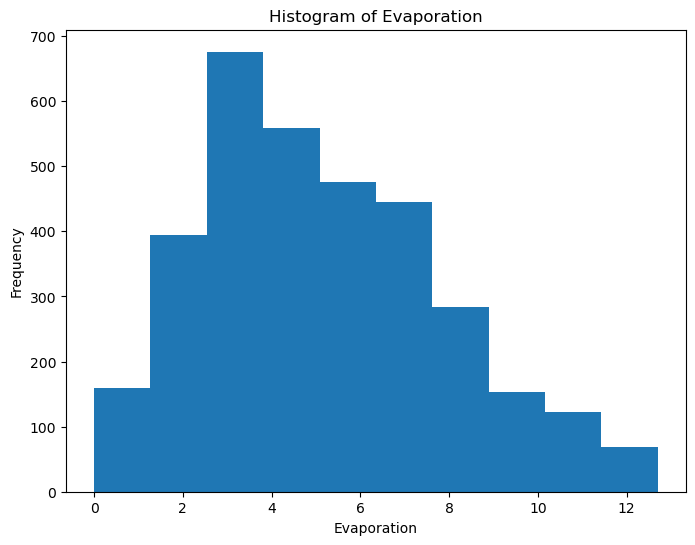

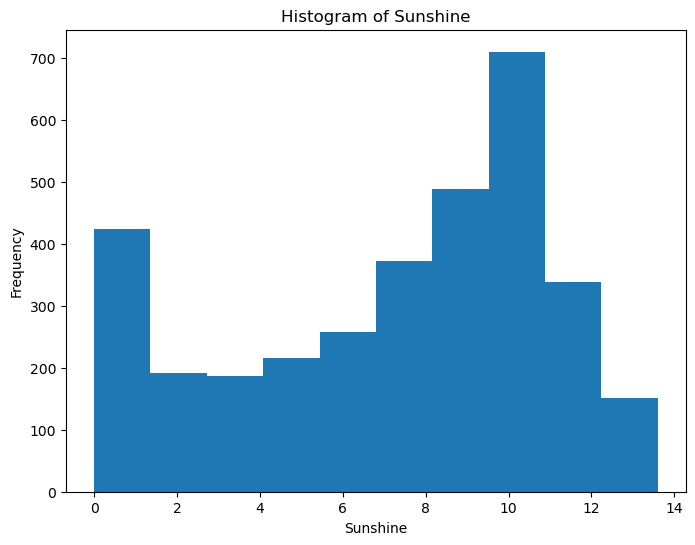

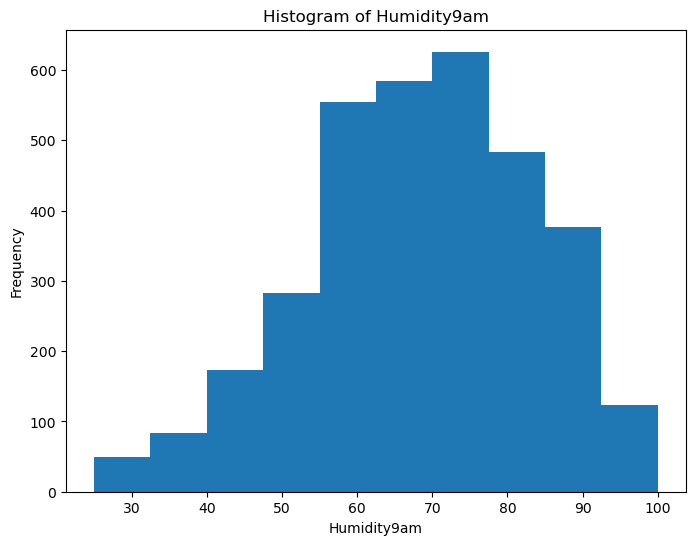

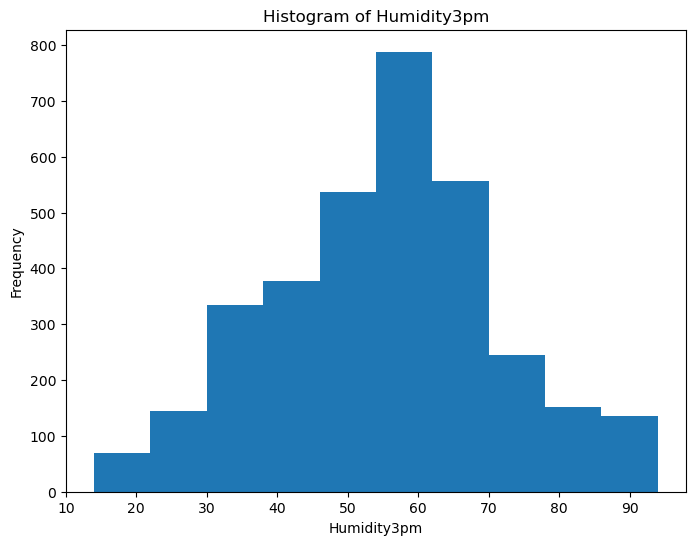

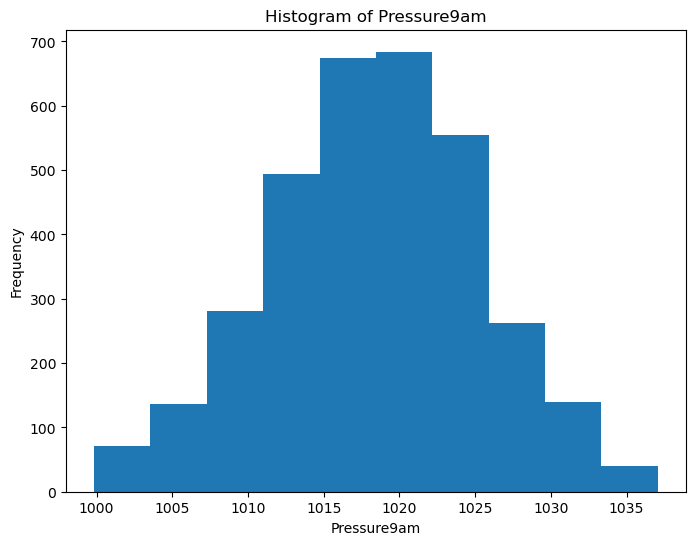

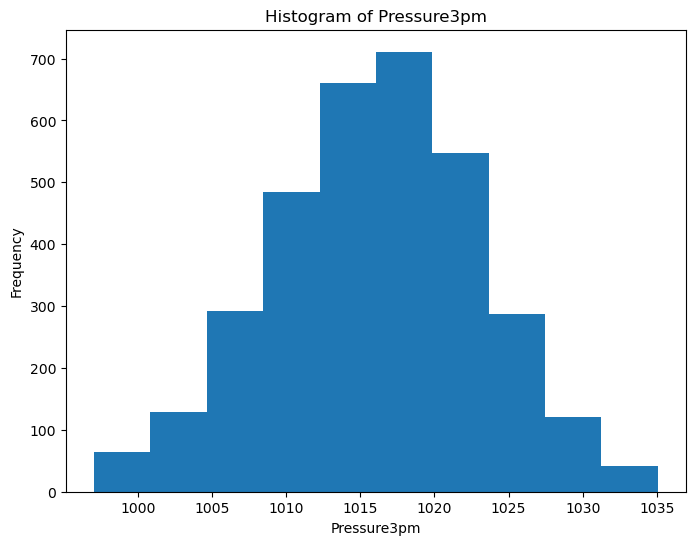

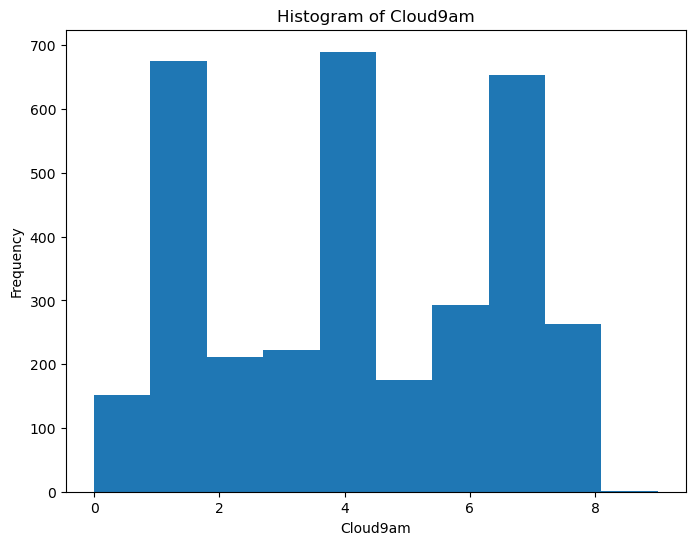

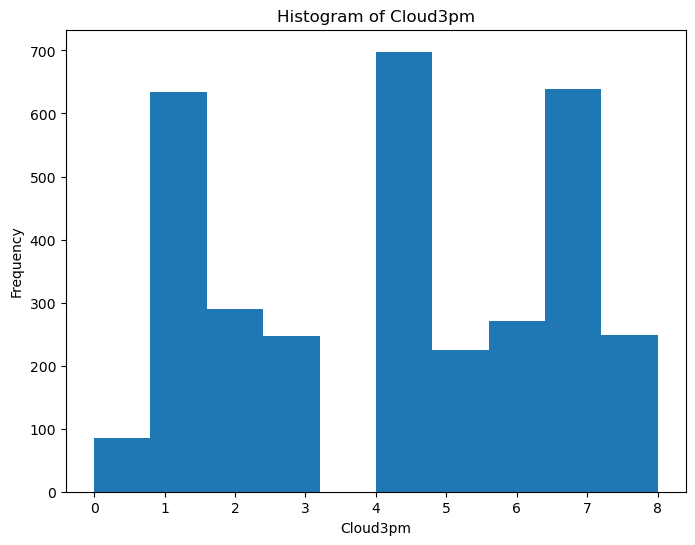

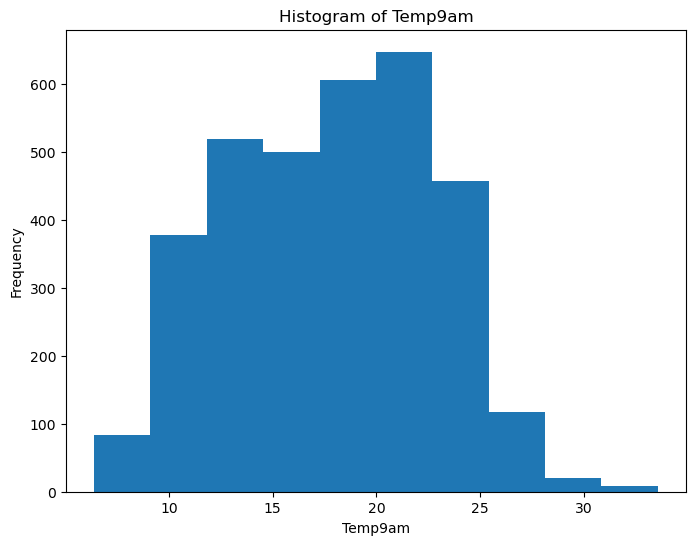

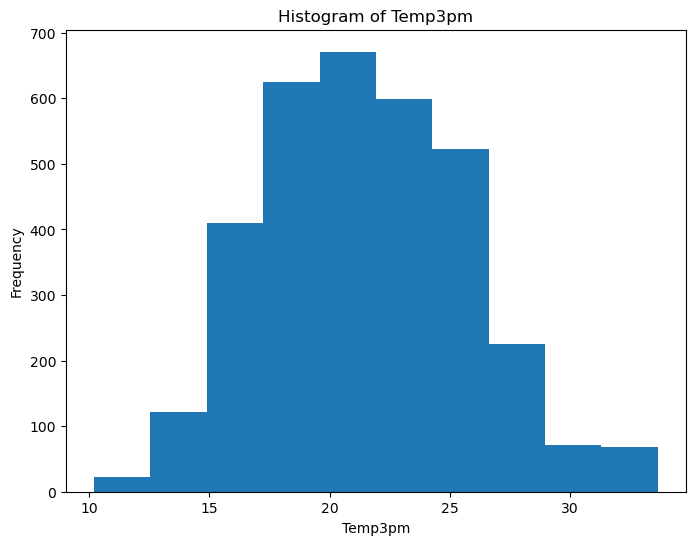

In [86]:
# creating separate histograms

for feature in df.columns:
    if df[feature].dtype == 'float64':  # Check if the feature is numerical
        plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
        plt.hist(df[feature], bins=10)  # Adjust the number of bins as per your preference
        plt.title('Histogram of {}'.format(feature))
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()


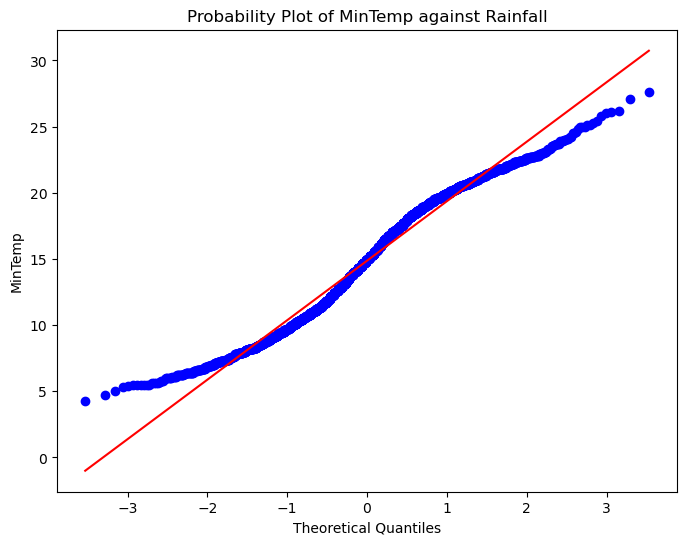

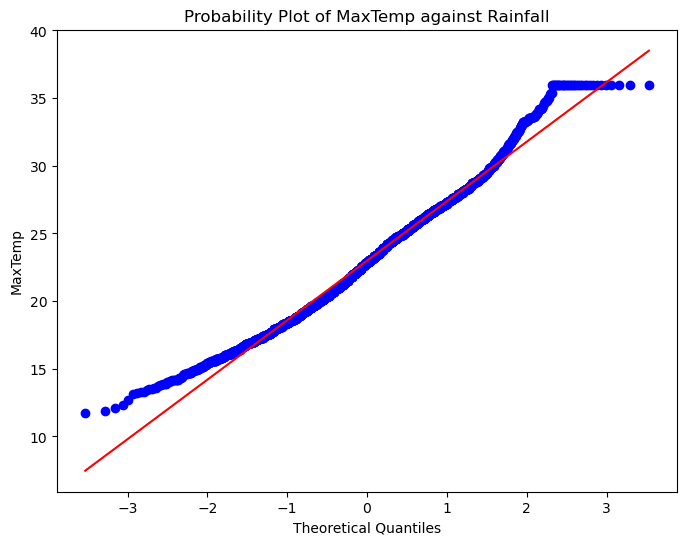

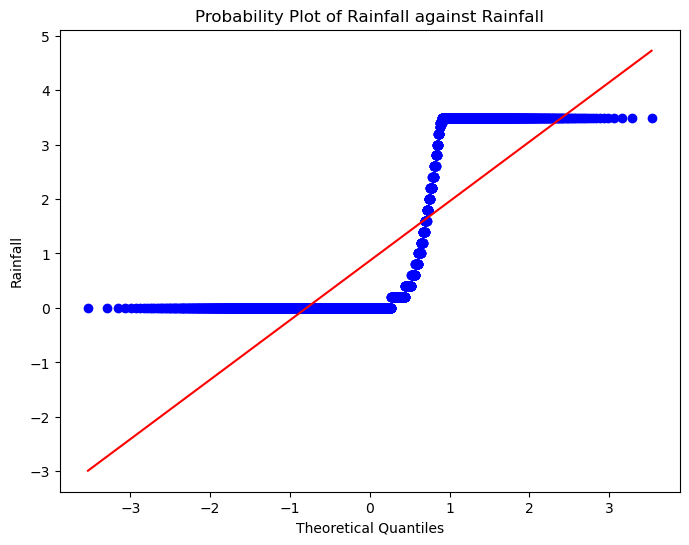

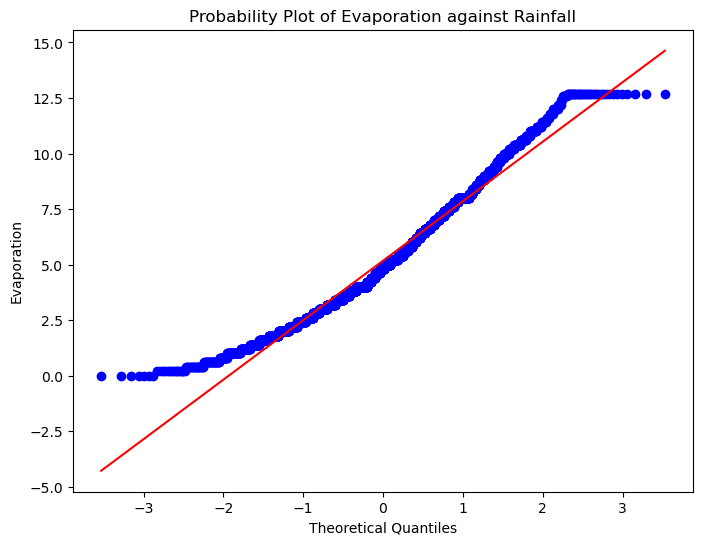

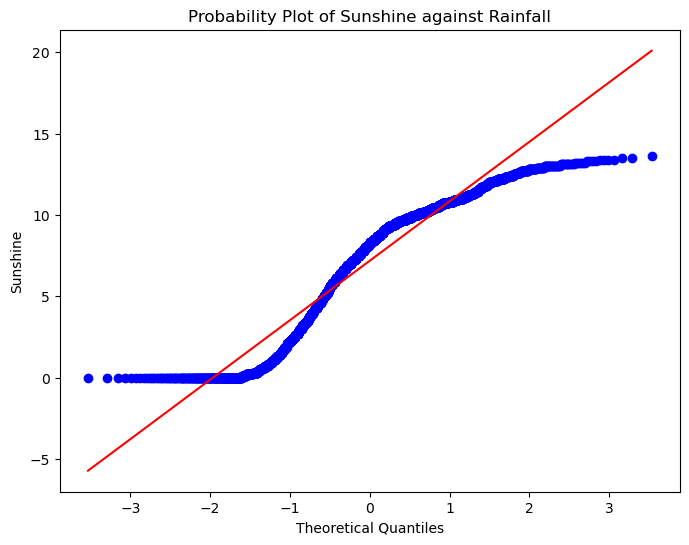

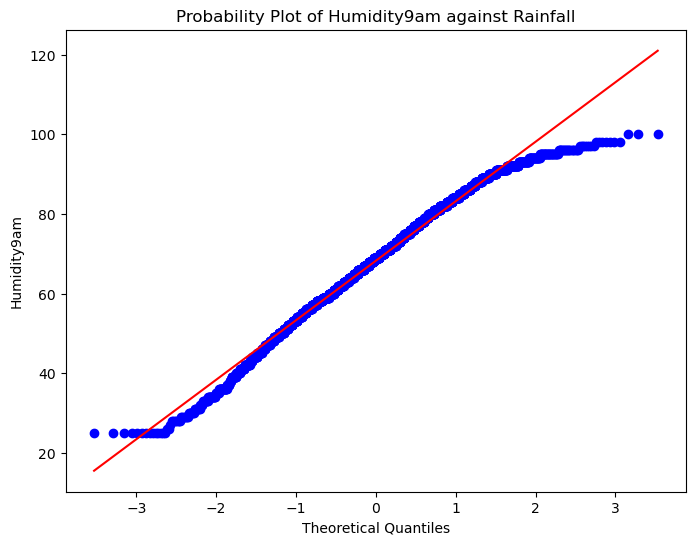

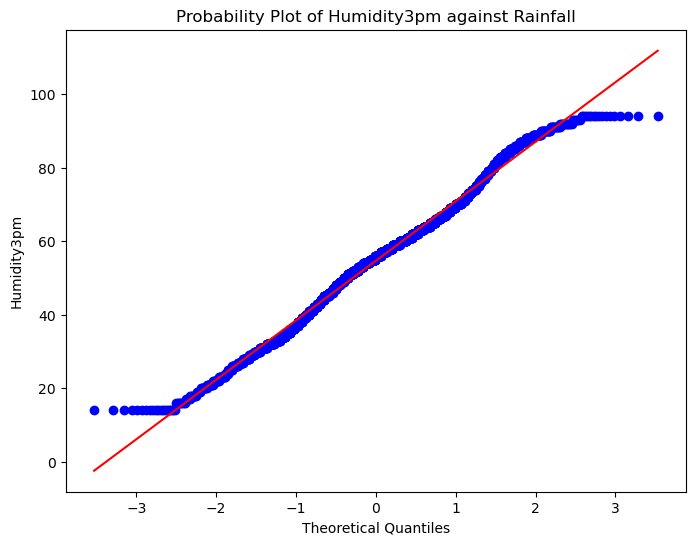

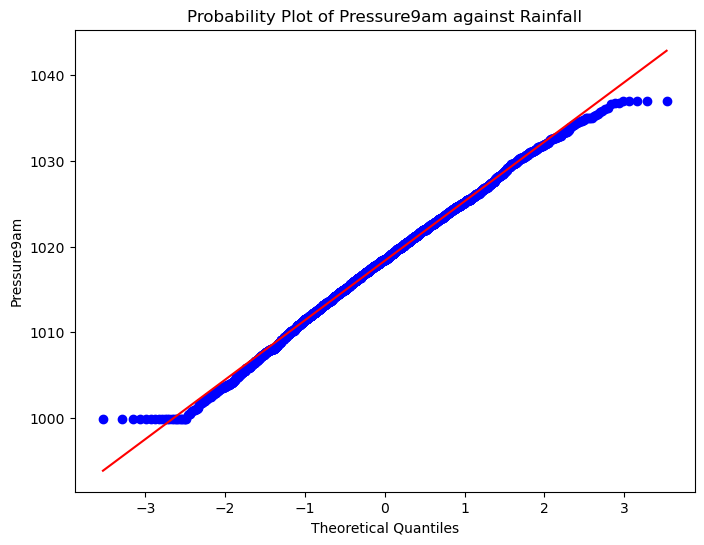

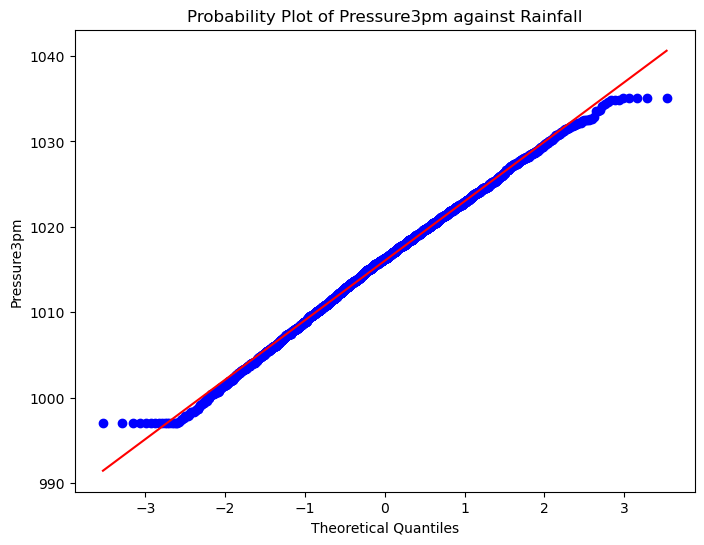

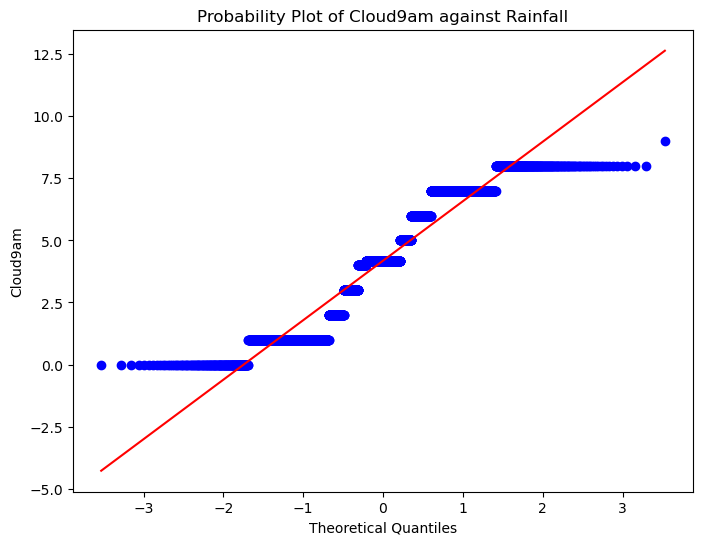

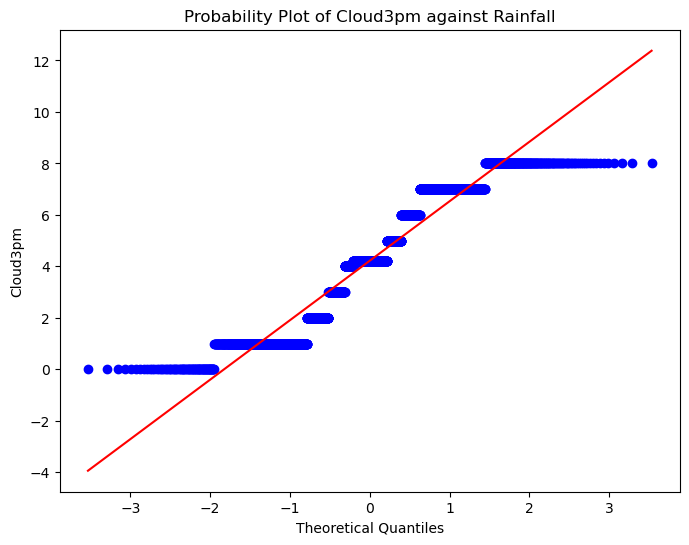

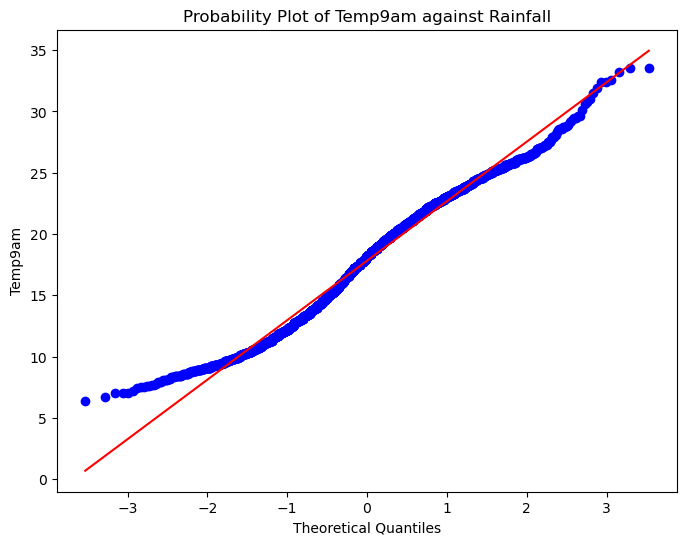

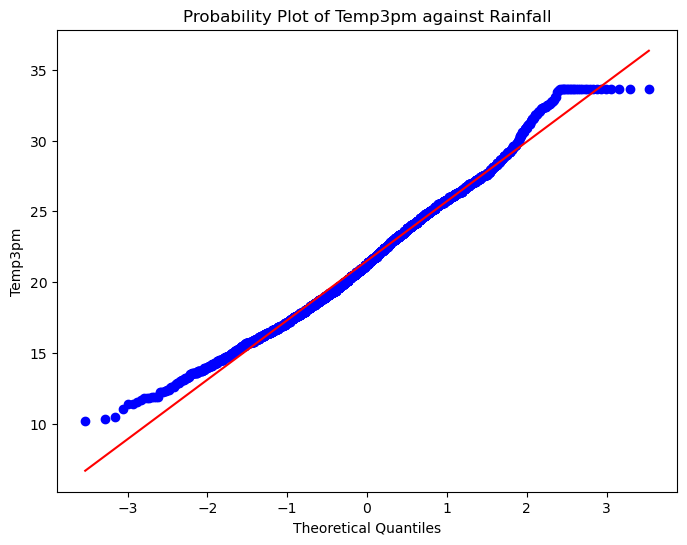

In [35]:
# Probability plots
for feature in df.columns:
    if df[feature].dtype == 'float64':  # Check if the feature is numerical
        plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
        stats.probplot(df[feature], plot=plt)
        plt.title('Probability Plot of {} against Rainfall'.format(feature))
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel(feature)
        plt.show()


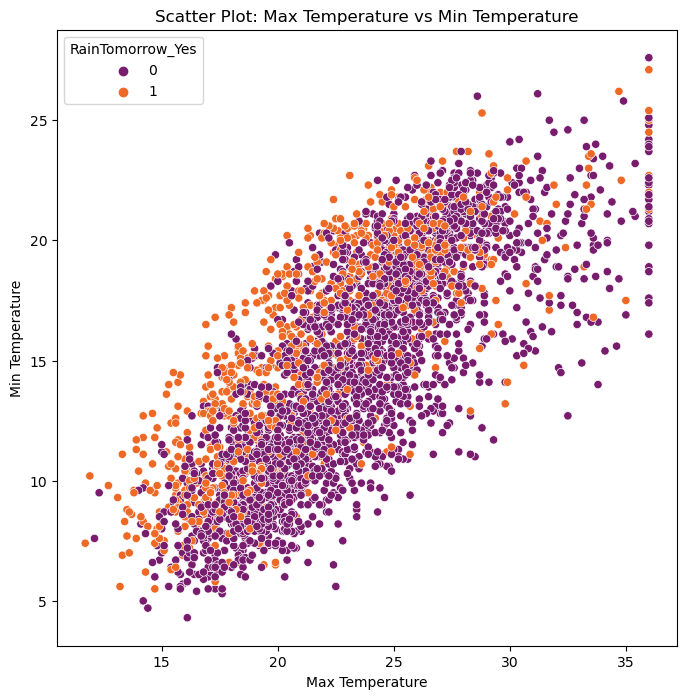

In [36]:
#Scatter Plot: Max Temperature vs Min Temperature with cluster type visualization

plt.figure(figsize=(8, 8))
sns.scatterplot(x='MaxTemp', y='MinTemp', hue='RainTomorrow_Yes', palette='inferno', data=df)
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.title('Scatter Plot: Max Temperature vs Min Temperature')
plt.show()


Interpretation-
* Relataionship between max and min temp is linear , 
* as the linear realationship of min and max temp increases probability of rain also increases 


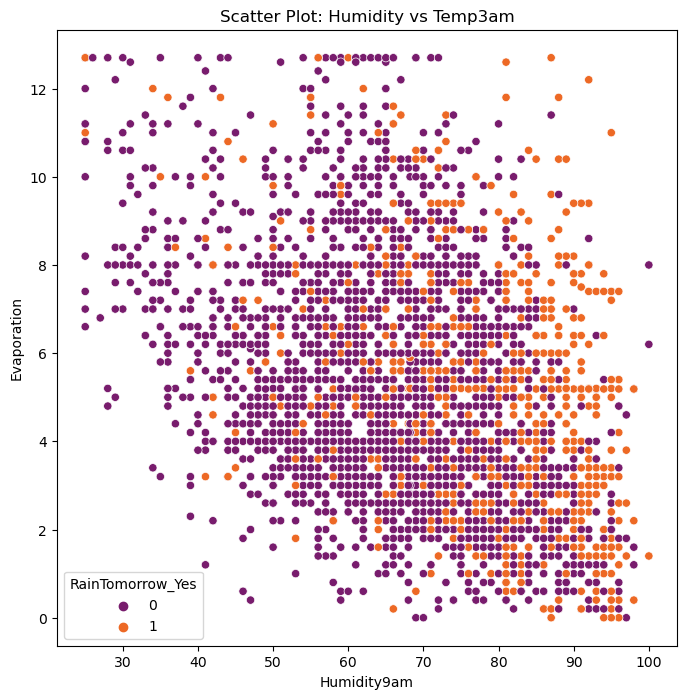

In [37]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Humidity9am', y='Evaporation', hue='RainTomorrow_Yes', palette='inferno', data=df)
plt.xlabel('Humidity9am')
plt.ylabel('Evaporation')
plt.title('Scatter Plot: Humidity vs Temp3am')
plt.show()


**Splitting data set into x and y**

In [38]:
x=df.loc[:,df.columns!="RainTomorrow_Yes"]
y=df["RainTomorrow_Yes"]

In [39]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
0,19.5,22.4,3.49,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1
1,19.5,25.6,3.49,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1
2,21.6,24.5,3.49,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1
3,20.2,22.8,3.49,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1
4,19.7,25.7,3.49,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

**FEATURE SCALING**

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)


**SPLITING DATA INTO TRAIN AND TEST SETS**

In [42]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**TRAING MODELS**

**Model 1- Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[447  37]
 [ 82 102]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       484
           1       0.73      0.55      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.76       668
weighted avg       0.81      0.82      0.81       668

0.8218562874251497


**Model 2- Decision tree classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


[[409  75]
 [ 73 111]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       484
           1       0.60      0.60      0.60       184

    accuracy                           0.78       668
   macro avg       0.72      0.72      0.72       668
weighted avg       0.78      0.78      0.78       668

0.7784431137724551


**Moel 3- AdaBoost with Decision Tree**

In [46]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoost Classifier with a Decision Tree base estimator
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

# Train the classifier on the training data
classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(accuracy))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, predictions))

Accuracy Score: 0.77
Confusion Matrix:
[[404  80]
 [ 71 113]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       484
           1       0.60      0.60      0.60       184

    accuracy                           0.78       668
   macro avg       0.72      0.72      0.72       668
weighted avg       0.78      0.78      0.78       668



C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Model 4- RANDOM FOREST (BEST MODEL WITH 0.83 ACCURACY**)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

classifier = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the classifier on the training data
classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(accuracy))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print the classification report
print(classification_report(y_test, y_pred))




Accuracy Score: 0.83
Confusion Matrix:
[[448  36]
 [ 80 104]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       484
           1       0.74      0.57      0.64       184

    accuracy                           0.83       668
   macro avg       0.80      0.75      0.76       668
weighted avg       0.82      0.83      0.82       668



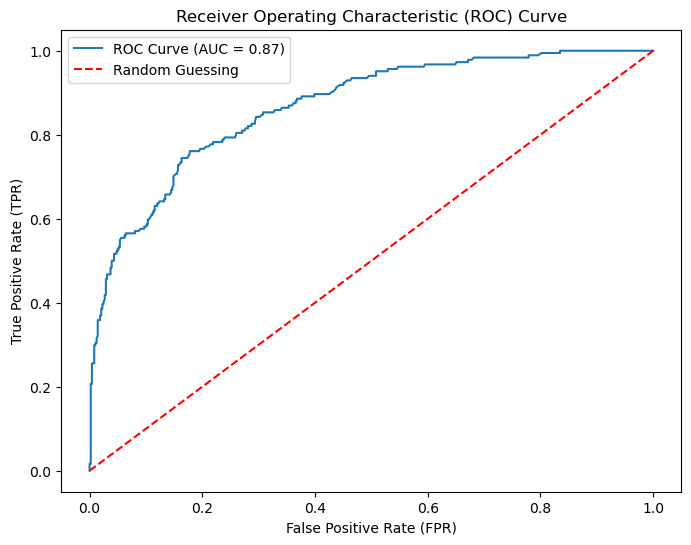

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

y_pred_probs = classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**Model 5 AdaBoost with Random Forest** same accuracy as Random forest

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Create a Random Forest base estimator
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an AdaBoost Classifier with the Random Forest base estimator
classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100)

# Train the classifier on the training data
classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(accuracy))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, predictions))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score: 0.83
Confusion Matrix:
[[453  31]
 [ 82 102]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       484
           1       0.60      0.60      0.60       184

    accuracy                           0.78       668
   macro avg       0.72      0.72      0.72       668
weighted avg       0.78      0.78      0.78       668



**Model 6 Decission tree with Bagging**

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features in X and labels in y
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a Bagging classifier with Decision Tree as the base estimator
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Training the classifier
bagging.fit(x_train, y_train)

# Making predictions on the test set
predictions = bagging.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(accuracy))

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(accuracy))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, predictions))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score: 0.83
Accuracy Score: 0.83
Confusion Matrix:
[[448  36]
 [ 80 104]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       484
           1       0.73      0.58      0.64       184

    accuracy                           0.82       668
   macro avg       0.79      0.75      0.76       668
weighted avg       0.82      0.82      0.82       668



**Model 7 - XG boost**

In [61]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating the gradient boosting classifier
xgb_classifier = xgb.XGBClassifier()

# Training the classifier
xgb_classifier.fit(x_train, y_train)

# Making predictions on the test set
predictions = xgb_classifier.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(accuracy))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, predictions))

Accuracy Score: 0.83
Confusion Matrix:
[[448  36]
 [ 80 104]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       484
           1       0.70      0.61      0.65       184

    accuracy                           0.82       668
   macro avg       0.78      0.75      0.76       668
weighted avg       0.81      0.82      0.81       668



**QUESTION/ANSWER**

**ANSWER 1**

Given the weather information of Sydney from 2008 to 2017,The problem statement involves creating a machine learning model to predict rainfall for a newspaper company called "The Daily Buzz." The company aims to provide a weather prediction service through a new column called "The Weather Oracle." 
task is to develop a classification model using various classification techniques, including decision tree classifiers and ensemble methods, and compare their accuracy.

Choosing the most relevant features that can help predict rainfall accurately. Factors such as temperature, humidity, wind speed/direction, atmospheric pressure, geographical location, and any other variables that may impact rainfall patterns should be considered.Rainfall patterns can exhibit seasonality, trends, and spatial dependencies. Consider incorporating time-based features, such as month, day, or hour, and spatial features like latitude and longitude.
To accomplish this task, it is important to consider the following factors:

Rainfall patterns: Rainfall can exhibit seasonality, trends, and spatial dependencies. Incorporating time-based features (e.g., month, day, hour) and spatial features (e.g., latitude, longitude) can help capture these patterns.

Ensemble methods: Ensemble methods combine multiple ML models to improve predictive accuracy. We will explore various ensemble methods and select the one that yields the best accuracy for rainfall prediction in Sydney.

To evaluate the performance of each model, the accuracy score and a confusion matrix will be used. The accuracy score provides an overall measure of how well the model predicts rainfall, while the confusion matrix helps evaluate the model's performance in terms of true positives, true negatives, false positives, and false negatives.

After comparing the accuracy scores and examining the confusion matrix, we have to select the best-performing model and analyze why it outperformed the others. 

Overall, the problem statement presents an interesting task of building a rainfall prediction model using classification techniques. It offers an opportunity to apply decision tree classifiers and ensemble methods, analyze their performance, and explore methods for enhancing accuracy.

**ANSWER 2**

To solve this task of predicting rainfall using various classification models, I would follow a systematic approach that includes the following steps:

1. Data Loading and Preprocessing: I would start by loading the dataset containing the weather data for Sydney. Then, I would perform data preprocessing tasks such as handling missing values, handling categorical variables (if any), feature scaling, and splitting the data into training and testing sets. This step ensures that the data is in a suitable format for model training and evaluation.

2. Model Selection: Next, I would select the classification models to be used for predicting rainfall. As mentioned in the problem statement, I would consider decision tree classifiers and ensemble methods such as Random Forest Classifier. These models are well-suited for weather prediction tasks.

3. Model Training and Evaluation: I would train each selected model on the training data and evaluate its performance using appropriate evaluation metrics. For classification models, common evaluation metrics include accuracy, precision, recall, and F1-score. I would also create a confusion matrix to get a detailed understanding of the model's predictions.

4. Comparison of Model Performance: After evaluating each model, I would compare their accuracy scores and other performance metrics. This would help identify the model with the best performance in terms of predicting rainfall.

5. Analysis of Best Model: Once the best model is identified, I would analyze why it performed better than other models. This analysis could involve examining the model's ability to capture important features, handling of class imbalance (if present), or any unique characteristics of the selected model that contribute to its accuracy.

6. Further Improvements: To improve the accuracy of the selected model, I would explore possible avenues such as hyperparameter tuning, feature selection or engineering, ensemble methods (e.g., bagging or boosting), or considering alternative classification algorithms. These steps aim to optimize the model's performance and potentially achieve better accuracy in predicting rainfall.

7. Final Model Deployment: Once the model has been selected, analyzed, and fine-tuned, it can be deployed for making predictions on new, unseen data. This would involve applying the trained model on real-time or future weather data to predict rainfall.

By following this approach, we can systematically develop and evaluate classification models for rainfall prediction, compare their performance, identify the best model, and explore ways to further improve accuracy.

**ANSWER 3**

For the task of predicting rainfall, there are several classification models available that can be considered. Some of the commonly used ML models for this task include:

1. Decision Tree Classifier: A decision tree is a simple yet powerful ML model that uses a tree-like structure to make decisions based on feature values. 

2. Random Forest Classifier: Random Forest is an ensemble learning method that combines multiple decision trees. It uses bagging to create diverse subsets of the training data and constructs multiple decision trees. The final prediction is made by aggregating the predictions of individual trees, leading to improved accuracy and robustness.

3. AdaBoost Classifier: AdaBoost (Adaptive Boosting) is another ensemble method that combines multiple weak learners (often decision trees) to create a strong learner. It assigns higher weights to misclassified samples in each iteration, allowing subsequent weak learners to focus more on those samples and improve overall accuracy.

4. Gradient Boosting Classifier: Gradient Boosting is another popular ensemble method that builds decision trees sequentially, where each subsequent tree corrects the mistakes made by the previous tree. It minimizes a loss function using gradient descent to improve the overall prediction performance.

5. XGBoost Classifier: XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosting that provides better performance and scalability. It incorporates regularization techniques, parallel processing, and other enhancements to improve accuracy and training speed.

6. LightGBM Classifier: LightGBM is another gradient boosting framework that is known for its high efficiency and fast training speed. It uses a histogram-based approach for feature discretization and employs leaf-wise tree growth, making it a suitable choice for large-scale datasets.

7. CatBoost Classifier: CatBoost is a gradient boosting algorithm that can handle categorical features directly without the need for extensive preprocessing. It employs an innovative approach called ordered boosting, which provides better handling of categorical variables and achieves high accuracy.


**ANSWER 4**

Random Forest ensemble model's performance is the best among the models with 0.83 accuracy score and Confusion Matrix:

[[448  36]
 [ 80 104]]
 
 i.e True Negatives (TN): 448
     False Positives (FP): 36
     False Negatives (FN): 80
     True Positives (TP): 104
     
Other models also had similar accuracy score but i choose Random forest because there are several possible reasons for its superior performance:

1. Ensemble of Decision Trees: Random Forest combines multiple decision trees, which helps to reduce overfitting and improve generalization. Each tree is trained on a different subset of the data, and their predictions are aggregated to make the final prediction.

2. Feature Randomness: Random Forest introduces randomness in the feature selection process. It randomly selects a subset of features at each split, which increases the diversity among the trees and reduces the chances of overfitting.

3. Robust to Outliers and Noise: Random Forest is robust to outliers and noisy data due to the averaging effect of multiple trees. Outliers have less impact on the overall predictions, leading to more stable and accurate results.

4. Handles High-Dimensional Data: Random Forest performs well even in high-dimensional datasets. It can handle a large number of features without overfitting, making it suitable for tasks with a large feature space.

5. Effective Handling of Nonlinear Relationships: Random Forest can capture complex nonlinear relationships between features and the target variable. It can identify and model interactions between variables, leading to improved predictive performance.

6. Limited Hyperparameters: Random Forest has fewer hyperparameters compared to other ensemble methods, making it easier to tune and optimize. This reduces the risk of overfitting and simplifies the model selection process.

Overall, the combination of these factors contributes to the superior performance of the Random Forest ensemble model for predicting rainfall in this particular task.

**ANSWER 5**

To improve the performance of the selected Random Forest ensemble model for predicting rainfall, the following steps can be taken:

1. Feature Engineering: Explore and analyze the available features to create new relevant features that may enhance the model's predictive power. This can involve feature transformation, interaction terms, or domain-specific feature engineering techniques.

2. Hyperparameter Tuning: Conduct a more comprehensive search for optimal hyperparameters using techniques like grid search or randomized search. Experiment with different values for parameters such as the number of estimators, maximum depth, minimum samples split/leaf, and maximum features.

3. Cross-Validation: Implement a robust cross-validation strategy to evaluate the model's performance and ensure its generalizability. This helps in assessing the model's stability and provides insights into potential areas for improvement.

4. Handling Class Imbalance: If there is a class imbalance in the target variable (rainfall vs. non-rainfall), consider using techniques such as oversampling, undersampling, or class weighting to balance the classes and prevent bias towards the majority class.

5. Ensemble Variation: Explore variations of the Random Forest ensemble model, such as Gradient Boosting algorithms (e.g., XGBoost or LightGBM), and compare their performance. Ensemble models with different algorithms may capture unique patterns and improve overall prediction accuracy.

6. Model Stacking or Blending: Experiment with combining the predictions of multiple models, including the selected Random Forest model, using stacking or blending techniques. This can potentially leverage the strengths of different models and enhance prediction accuracy.

7. More Data: Collecting additional relevant data, if feasible, can help improve the model's performance by providing more information and reducing data limitations.

8. Model Interpretation: Gain insights into the model's decision-making process by interpreting feature importance and understanding the factors that contribute most to rainfall prediction. This can help refine the feature selection process and improve model performance.

9. Regularization: Apply regularization techniques such as feature selection, dropout, or early stopping to prevent overfitting and enhance generalization.

10. Model Monitoring and Updating: Continuously monitor the model's performance and update it as new data becomes available. This ensures that the model remains effective and accurate over time.

By implementing these steps, it is possible to further enhance the performance of the selected Random Forest ensemble model for rainfall prediction.

**THANK YOU**